<a href="https://colab.research.google.com/github/KrishnanandSingh/EVA/blob/master/Project-4/Second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thought

To decrease the number of parameters there is nothing better than maxpool but the only problem is we want to do some convolutions before we do max pool and adding maxpool layer before prediction layer would cause to loose relevant information. 

If large kernel is chosen at the input layer it can convolve better without much increase in the number of parameters. Also observing that the dataset is very simple I can try doing max pool after the convolution from the large kernel.

# Observation

It worked well but still the network has 18k+ parameters. To reduce further we would have to add another maxpool layer. For which we would also want to do some convolutions. Starting with large kernel 9x9 caused large number of parameters.

### **Import Libraries and modules**

Install keras quitely
and import it to be able to use it later

In [1]:
!pip install -q keras
import keras

Using TensorFlow backend.


import the numpy library and refer it as np
import models and layers

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

load the dataset into 2D array(X_train and x_test) representing images
and matrix for their prediction classes(y_train, y_test)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Check the dimension of X_train, it has sixty thousand images of dimension 28 by 28.

Import the pyplot module from matplotlib to visualise the 2D array representations as images.

Display the output of plotting command below the code block

(60000, 28, 28)


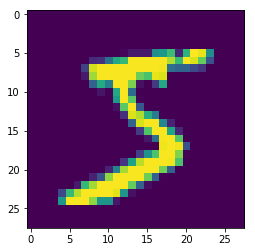

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

 Converting the greyscale image dataset to required input shape for coloured images

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

converting the values to float32 and normalising to convert them in floating values

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

last 10 values from training output

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert 1-dimensional class arrays to 10-dimensional class matrices
e.g. converting output 5 to [0,0,0,0,1,0,0,0,0,0]
now our network can predict values for each class 

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Create the model

In [58]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 9, 9, activation='relu', input_shape=(28,28,1))) #20
model.add(MaxPooling2D(pool_size=(2, 2))) #10
model.add(Convolution2D(32, 3, 3, activation='relu')) #8
model.add(Convolution2D(10, 1, 1, activation='relu')) #8

model.add(Convolution2D(10, 8))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 20, 20, 32)        2624      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 8, 8, 10)          330       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 1, 1, 10)          6410      
_________________________________________________________________
flatten_14 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_16 (Activation)   (None, 10)                0         
Total para

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (9, 9), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  


### Train the model

compile the defined model and set configurations to tell how it should learn

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Fitting the model with our training data to start learning.

Look at 32 images at once(batch_size), run 45 times(nb_epoch),  print output(verbose)

In [60]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=6, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 12s 194us/step - loss: 0.1773 - acc: 0.9467 - val_loss: 0.0610 - val_acc: 0.9804
Epoch 2/6
60000/60000 [==============================] - 9s 156us/step - loss: 0.0633 - acc: 0.9810 - val_loss: 0.0426 - val_acc: 0.9862
Epoch 3/6
60000/60000 [==============================] - 9s 155us/step - loss: 0.0463 - acc: 0.9853 - val_loss: 0.0383 - val_acc: 0.9874
Epoch 4/6
60000/60000 [==============================] - 9s 154us/step - loss: 0.0377 - acc: 0.9884 - val_loss: 0.0419 - val_acc: 0.9873
Epoch 5/6
60000/60000 [==============================] - 9s 154us/step - loss: 0.0317 - acc: 0.9901 - val_loss: 0.0340 - val_acc: 0.9883
Epoch 6/6
60000/60000 [==============================] - 9s 154us/step - loss: 0.0269 - acc: 0.9912 - val_loss: 0.0443 - val_acc: 0.9865


### Evalutate the model on validation data

calculate loss and accuracy

In [53]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.04132743603776471, 0.9892]


get predictions on the validation data

In [14]:
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])

[[0.0043949  0.00441425 0.00325839 0.00430078 0.00291533 0.00279357
  0.00429974 0.96583664 0.00248974 0.00529662]
 [0.01634536 0.01516775 0.7201897  0.0047771  0.01699581 0.00690335
  0.18994455 0.00935644 0.01020907 0.01011083]
 [0.00373958 0.96694964 0.00264957 0.00335604 0.00383408 0.00398566
  0.00279065 0.00562627 0.00316719 0.00390131]
 [0.9521516  0.0032286  0.0022169  0.00361814 0.00644812 0.00313577
  0.0164012  0.00265644 0.00250539 0.00763792]
 [0.00443552 0.006733   0.00482486 0.00500249 0.939383   0.00429943
  0.00495433 0.00344038 0.01308994 0.01383711]
 [0.00272841 0.973669   0.00200069 0.00232881 0.00344    0.00320772
  0.00238837 0.00530984 0.00173823 0.00318889]
 [0.02846782 0.06851818 0.02017304 0.01490753 0.6736807  0.0264636
  0.02285886 0.02847687 0.05641335 0.06004009]
 [0.0096862  0.02113299 0.01933487 0.01076626 0.13903187 0.01969844
  0.01472356 0.01200966 0.01540514 0.73821104]
 [0.02376249 0.00770624 0.00968013 0.00384444 0.0066481  0.69917357
  0.18543507 

### Visualising what filters are trying to extract

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

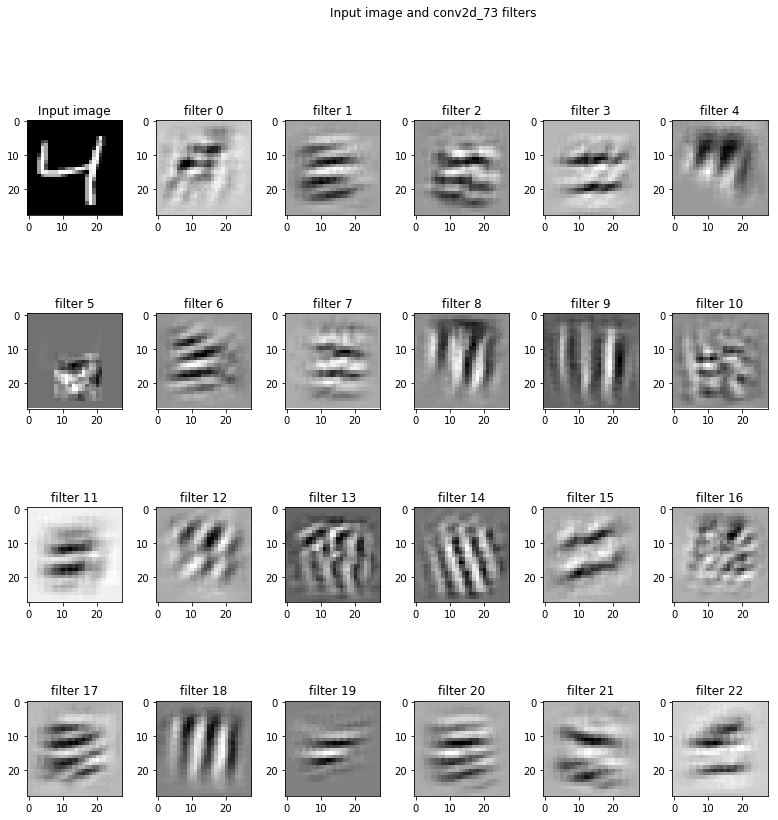

In [63]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name='conv2d_73')